K-means Clustering

In [1]:
import numpy as np
import pandas as pd

Question 1. Implementing K-mean Clustering, you need to run the k-means algorithm on the dataset for k=2,k=3.

In [3]:
# main kmean class 

class KMeansClustering:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(len(data), self.k, replace=False)]
        
        for _ in range(self.max_iters):
            # calculating distances and adding value to clusters
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            cluster_labels = np.argmin(distances, axis=1)
            
            # calculating new centroid
            new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(self.k)])
            
            # termination
            # if centroid don't change after iterations
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids
        
        return cluster_labels

In [5]:
# loading dataset
df = pd.read_csv('kmeans - kmeans_blobs.csv')
df

,x1,x2
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963
5,25.893,31.515
6,23.606,15.402
7,28.026,15.470
8,26.360,34.488
9,23.013,36.213


In [7]:
df.shape

(60, 2)

In [9]:
# normalization

df = (df - df.min()) / (df.max() - df.min())
data = df.values
data

array([[0.62245151, 0.66665161],
       [0.88977628, 0.19821142],
       [0.6689816 , 0.86506628],
       [0.02629099, 0.2731194 ],
       [0.66471551, 0.01244326],
       [0.65918448, 0.63465143],
       [0.60246044, 0.27077076],
       [0.71208889, 0.27230641],
       [0.6707674 , 0.70179084],
       [0.58775237, 0.7407466 ],
       [0.70695471, 0.86843116],
       [1.        , 0.8766288 ],
       [0.89689469, 0.71570199],
       [0.65608413, 0.05769969],
       [0.        , 0.39956189],
       [0.10097227, 0.32515074],
       [0.83511087, 0.        ],
       [0.86666005, 0.1472189 ],
       [0.17354531, 0.58747544],
       [0.85775584, 0.77060139],
       [0.13398482, 0.19676611],
       [0.53916365, 0.03737495],
       [0.09799593, 0.41776383],
       [0.62555186, 0.79966577],
       [0.12981795, 0.28831779],
       [0.65469517, 0.09026445],
       [0.11329927, 0.56918317],
       [0.73825587, 0.70294257],
       [0.38759363, 0.44829611],
       [0.81484697, 0.94869131],
       [0.

Question 2. you should have 2 plots - one for k = 2 and the other for k = 3. In the plot, you need to plot the given dataset and use different colors to show points belonging to a particular cluster. 

In [11]:
# traning and testing

kmeans2 = KMeansClustering(k=2)
labels_k2 = kmeans2.fit(data)

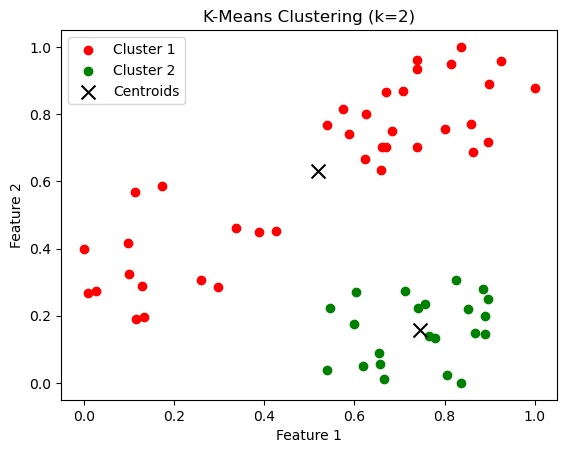

In [17]:
# plot for k=2

import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(2):
    plt.scatter(data[labels_k2 == i, 0], data[labels_k2 == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans2.centroids[:, 0], kmeans2.centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means Clustering (k=2)')
plt.show()

In [29]:
# traning for k = 3

kmeans3 = KMeansClustering(k=3)
labels_k3 = kmeans3.fit(data)

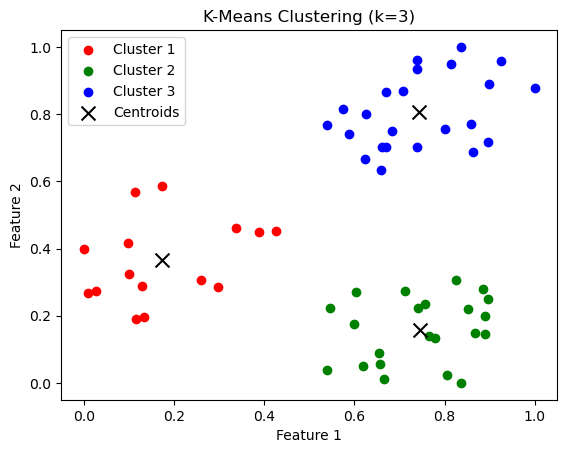

In [21]:
# plot for k = 4

for i in range(3):
    plt.scatter(data[labels_k3 == i, 0], data[labels_k3 == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans3.centroids[:, 0], kmeans3.centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means Clustering (k=3)')
plt.show()